In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def voting_1():
    """
    Prints pie graph of 50/50 split
    :returns: pie split
    """
    pd.Series(('A','B')).pie()

# Pie Charts
Use pie charts to visualize *relative* data

In [5]:
%matplotlib  inline
fifty=pd.Series((1,1))


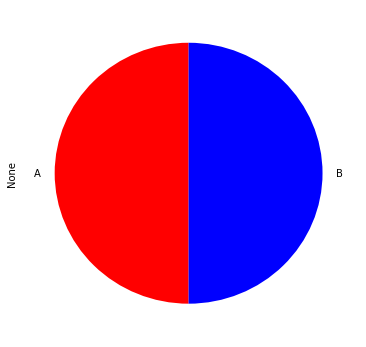

In [6]:
def voting_1():
    #fifty.plot(kind='pie', figsize=(6,6))
    pd.Series(index=('A','B'), data=(0.5, 0.5)).plot(kind='pie', colors=('red', 'blue'), figsize=(6,6), legend=False, startangle=90)
    
voting_1()

In [3]:
voting_1_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48648859/m-48729157'

In [7]:
def voting_2():
    """
    prints pie chart, good for relative data
    :returns : 
    """
    votes = pd.DataFrame(index=('A','B'), data={'Votes':(724, 181)})
    return 100*votes.Votes/votes.Votes.sum()

In [10]:
def voting_2_with_series():
    """
    Calculates the percentage of each value in a series relative to sum of a series
    """
    votes = pd.Series({'A': 724, 'B': 181})
    #Multiplying by 100 only to convert to proportion of "100" for "percent"
    return 100* votes/votes.sum()
voting_2_with_series()

A    80.0
B    20.0
dtype: float64

In [16]:
assert (voting_2().values==pd.Series((80,20))).all(), '80 percent votes for A, only 20 percent voted for B'
assert (np.allclose(voting_2().values, pd.Series((80,20)))), '80 percent votes for A, only 20 percent voted for B'
assert (np.allclose(voting_2_with_series(), pd.Series((80, 20)))), '80 A, 20 B'
voting_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48747153/m-48697516'

In [17]:
pd.Series((80, 20))

0    80
1    20
dtype: int64

In [18]:
def voting_3():
    voting_2().plot(kind='pie', colors=('red', 'blue'), legend=False, figsize=(6,6), startangle=90)

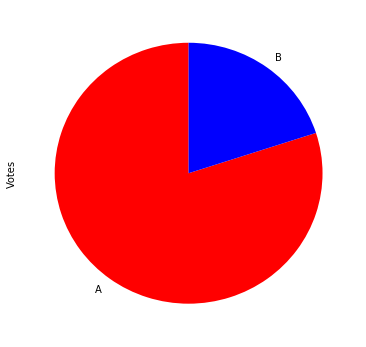

In [19]:
voting_3()
voting_3_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48728369/m-48723323'

In [23]:
def relative_data(new_size_b=23000):
    """
    Prints pie chart same as voting_3, just invariant to the total number of votes;
    relative sizes
    :params new_size_b: new size B
    :returns: the size of A  voters based on voting_2() percentages (80%)
    """
    #total size should be 23,000 / 0.2 = 115,000
    total_size = new_size_b/(voting_2()['B']/100)
    
    #new_size is 80% of the total size; 92000
    #print(total_size) 
    new_size_a = total_size * (voting_2()['A']/100)
    new_size =  pd.Series({'A': new_size_a, 'B': new_size_b})#index=('A','B'), data=( new_size_a, new_size_b))
    new_size.plot(kind='pie', colors=('red', 'blue'), legend=False, figsize=(6,6), startangle=90)
    return new_size['A']

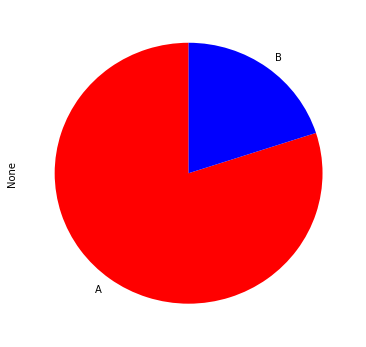

In [25]:
assert relative_data() == 92000, 'The 23K is 20% , so the total is 115K , so the 80% should be  92K, not {}'.format(relative_data())
relative_data_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48726369/m-48721272'

In [ ]:
def relative_data_sebastians_way(new_size_b=23000):
    #The values stay relative to *the whole* i.e. some percentage of 100
    # But the values also stay relative to *one another* , as Sebastian explains
    """https://classroom.udacity.com/courses/st101/lessons/48646868/concepts/487263690923
    You can see this, because 80's exactly 4 times as much as 20. So if you took 23,000, divide by """
    relative_proportion = voting_2().A/voting_2().B
    


In [142]:
def pick_the_breaks(series=None, colors=list(reversed(('blue','red','black')))):
    """
    Suppose you're taking a Udacity class
    Following age distribution
    """
    students = series if series is not None else pd.Series(index=('13-19','20-32','33-999'), data=(12000, 96000, 36000)).iloc[::-1]
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6))
    return pd.Series([_/(1/12) for _ in reversed((students  )/ students.sum())]).cumsum()

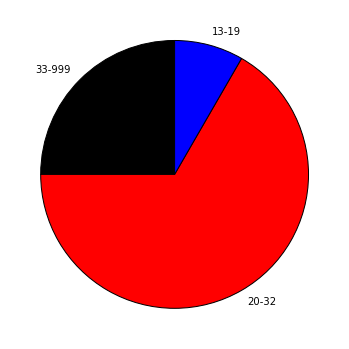

In [143]:
assert pick_the_breaks()[0]==1., 'Percentages should be at 1/12, 8/12 (9/12 cumulatively), and 3/12 (12/12 cumulatively) respectively'

In [144]:
pick_the_breaks_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48726370/m-48678723'

In [145]:
def pick_the_breaks_2():
    return pick_the_breaks()[1]

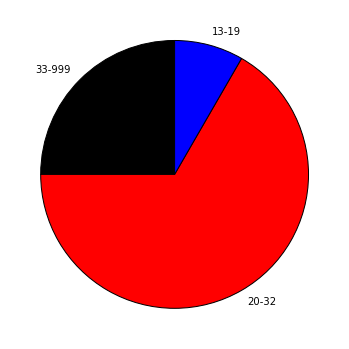

In [146]:
assert pick_the_breaks_2() == 9, 'Second one is 9'
pick_the_breaks_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48532783/m-48742003'

In [149]:
def build_a_chart():
    return pick_the_breaks(pd.Series(index=list('ABCD'), data=(175, 50, 25, 50)).iloc[::-1], colors=list(reversed(('black', 
                                                                                                        'blue', 'red', 'green'))))

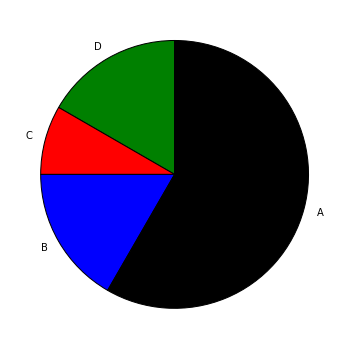

In [152]:
assert np.allclose(build_a_chart(), pd.Series(data=(7,9,10,12))), 'Respective twelfths are 7, 9, 10, for A, B, C. '
build_a_chart_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48747154/m-48739045'

In [157]:
def inferring_counts(series=None, new_total = 240000, colors=list(reversed(('black', 
                                                                                                        'blue', 'red', 'green')))):
    """
    Applying the same percentages to a series of a different total
    """
    students = series if series is not None else pd.Series(index=list('ABCD'), data=(175, 50, 25, 50)).iloc[::-1]
    students = (students/students.sum())*new_total
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6))
    return students

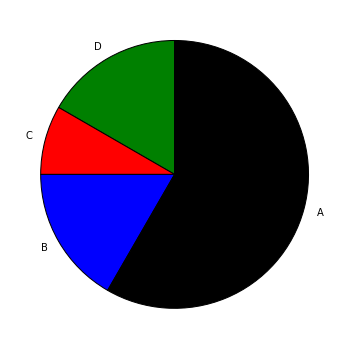

In [164]:

assert np.all(inferring_counts()==pd.Series(index=list('ABCD'), data=(140000, 40000, 20000, 40000))[::-1]), 'Values should be A 140K,  B 40K,  C 20K, D 40K'

In [165]:
inferring_counts_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48717441/m-48742005'